In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as skl

In [155]:
Dataframe_path = "database/housing.csv"
data = pd.read_csv(Dataframe_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<strong>Checking for Nan Values</strong>

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<strong>Droping the Nan Values</strong>

In [157]:
data.dropna(inplace=True)

<strong>Spliting the train and test data</strong>

In [158]:
from sklearn.model_selection import train_test_split

if(Dataframe_path == "database/housing.csv"):
    X = data.drop(['median_house_value'], axis=1)
    Y = data['median_house_value']
elif(Dataframe_path == "database/csv2.csv"):
    X = data.drop(['Price'], axis=1)
    Y = data['Price']

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

<strong>Analising Basic Correlation</strong>

In [160]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18537,-122.00,36.98,20.0,2502.0,454.0,981.0,399.0,4.3000,NEAR OCEAN,275000.0
1621,-122.08,37.82,4.0,2045.0,237.0,830.0,252.0,11.3421,NEAR BAY,500001.0
9575,-120.58,37.36,33.0,3564.0,716.0,2603.0,696.0,2.2179,INLAND,67500.0
9817,-121.92,36.62,52.0,974.0,190.0,403.0,181.0,4.3281,NEAR OCEAN,236500.0
16185,-121.30,37.95,9.0,674.0,242.0,575.0,193.0,2.2024,INLAND,45000.0
...,...,...,...,...,...,...,...,...,...,...
5668,-118.30,33.72,28.0,2510.0,583.0,1388.0,554.0,3.3397,NEAR OCEAN,267800.0
16579,-121.43,37.74,40.0,859.0,196.0,427.0,176.0,3.5789,INLAND,110400.0
3966,-118.57,34.20,36.0,2559.0,469.0,1358.0,445.0,4.5568,<1H OCEAN,201500.0
7525,-118.24,33.91,37.0,1607.0,377.0,1526.0,375.0,1.7158,<1H OCEAN,94300.0


In [161]:
if(Dataframe_path == "database/housing.csv"):
    train_data.ocean_proximity.value_counts()
elif(Dataframe_path == "database/csv2.csv"):
    train_data.Suburb.value_counts()

In [162]:
if(Dataframe_path == "database/housing.csv"):
    pd.get_dummies(train_data.ocean_proximity)
elif(Dataframe_path == "database/csv2.csv"):
    pd.get_dummies(train_data.Suburb)

<strong>Checking the Distribution between the feature colomns</strong>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

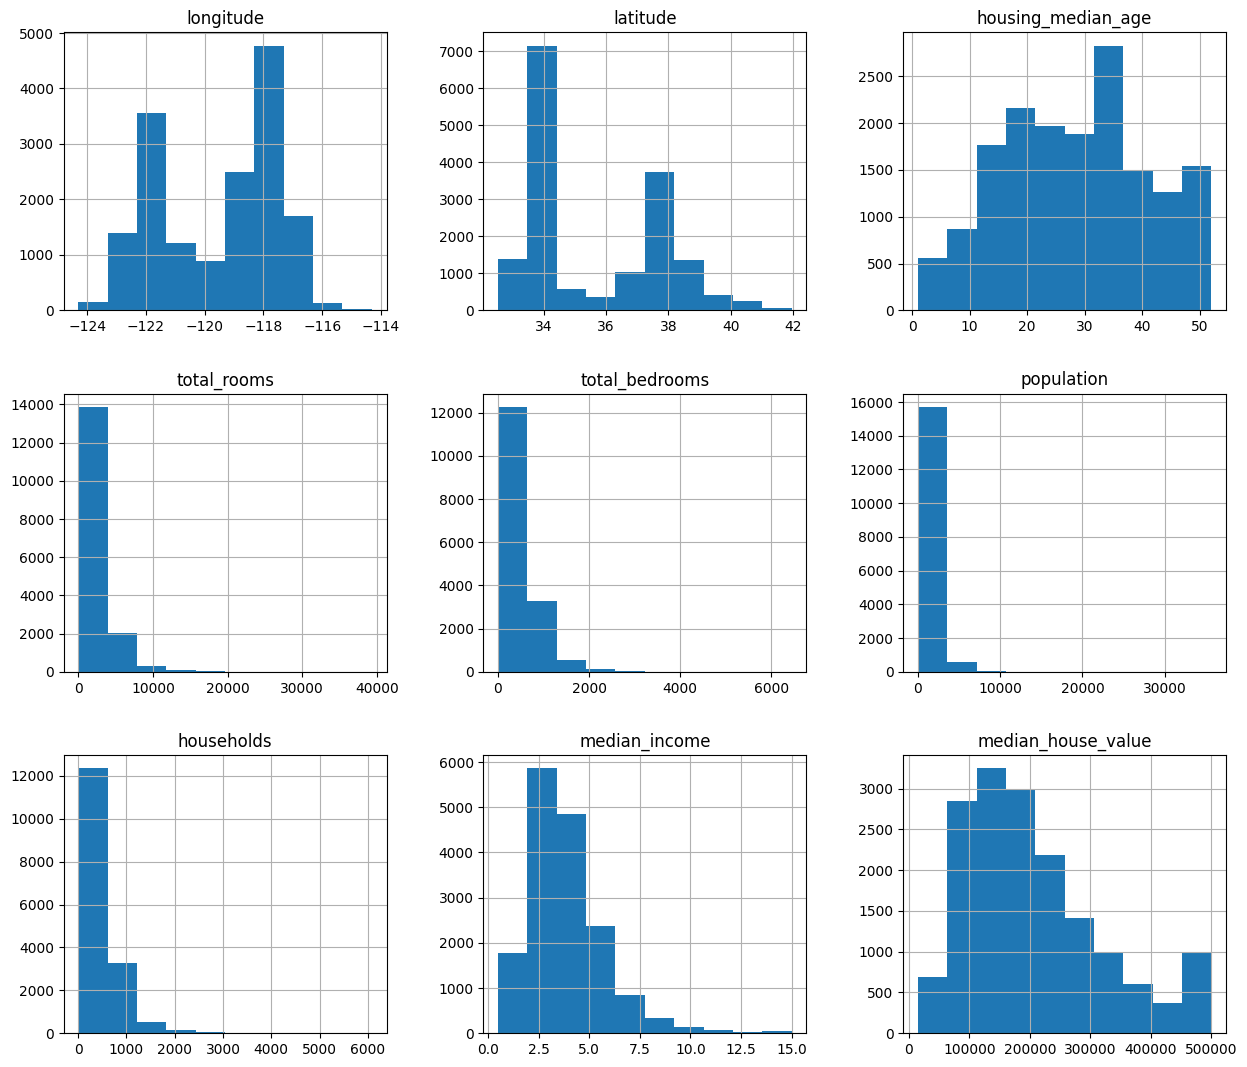

In [163]:
train_data.hist(figsize=(15, 13))

In [164]:
# Exclude non-numeric columns before calculating correlation
numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]

#correlation on numeric data
correlation_matrix = numeric_train_data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924996,-0.105018,0.039536,0.063364,0.091856,0.048954,-0.015537,-0.046054
latitude,-0.924996,1.000000,0.006982,-0.032081,-0.062186,-0.102605,-0.066083,-0.078006,-0.144012
housing_median_age,-0.105018,0.006982,1.000000,-0.359118,-0.318923,-0.289205,-0.301084,-0.116764,0.109120
total_rooms,0.039536,-0.032081,-0.359118,1.000000,0.930766,0.852191,0.917896,0.194026,0.131987
total_bedrooms,0.063364,-0.062186,-0.318923,0.930766,1.000000,0.873113,0.978507,-0.011694,0.048162
population,0.091856,-0.102605,-0.289205,0.852191,0.873113,1.000000,0.904021,0.001826,-0.028022
households,0.048954,-0.066083,-0.301084,0.917896,0.978507,0.904021,1.000000,0.009338,0.063885
median_income,-0.015537,-0.078006,-0.116764,0.194026,-0.011694,0.001826,0.009338,1.000000,0.687626
median_house_value,-0.046054,-0.144012,0.109120,0.131987,0.048162,-0.028022,0.063885,0.687626,1.000000


<strong>Building Correlation matix Heatmap</strong>

<Axes: >

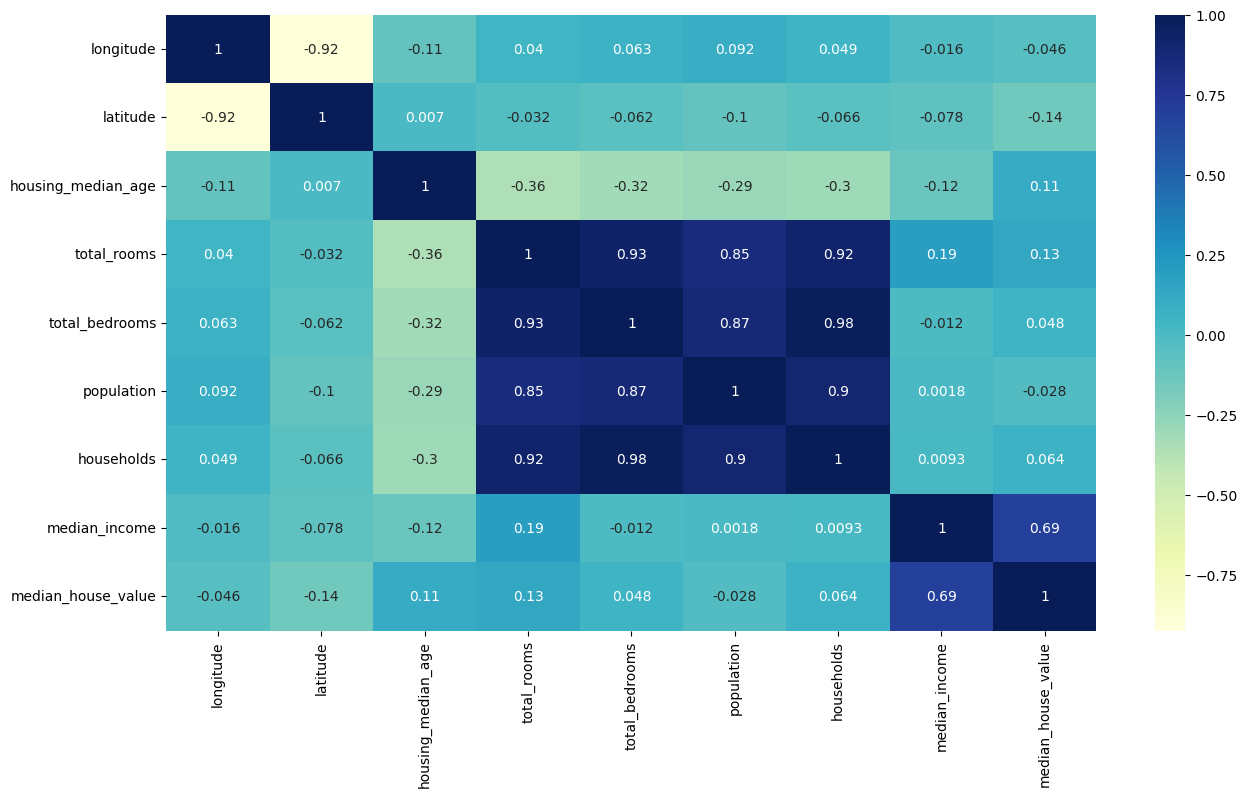

In [165]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

<h1><strong>Model Devolopment - Linear Regressor Model</strong></h1>

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]

if(Dataframe_path == "database/housing.csv"):
    x_train, y_train = numeric_train_data.drop(['median_house_value'], axis=1), numeric_train_data['median_house_value']
elif(Dataframe_path == "database/csv2.csv"):
    x_train, y_train = numeric_train_data.drop(['Price'], axis=1), numeric_train_data['Price']

x_train_s = scaler.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_train_s, y_train)

LinearRegression()

In [167]:
test_data = X_test.join(Y_test)

numeric_columns = test_data.select_dtypes(include=['number']).columns
numeric_test_data = test_data[numeric_columns]

if(Dataframe_path == "database/housing.csv"):
    X_test, Y_test = numeric_test_data.drop(['median_house_value'], axis=1), numeric_test_data['median_house_value']
elif(Dataframe_path == "database/csv2.csv"):
    X_test, Y_test = numeric_test_data.drop(['Price'], axis=1), numeric_test_data['Price']

Y_test


3472     431800.0
3460     182500.0
4433     139600.0
19389     85000.0
6337     302200.0
           ...   
768      190600.0
19556     62900.0
17896    235600.0
7388     112500.0
18906    121900.0
Name: median_house_value, Length: 4087, dtype: float64

In [168]:
X_test_s = scaler.transform(X_test)

In [169]:
regressor.predict(X_test_s)

regressor.score(X_test_s, Y_test)

0.6265515714916641

<h1><strong>Model Devolopment - Random Forest Regressor</strong></h1>

In [170]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()

forest_regressor.fit(x_train_s, y_train)

RandomForestRegressor()

In [171]:
forest_regressor.score(X_test_s, Y_test)

0.8049123315541274

<strong>Grid Search Cross Validation for more model Accuracy</strong>

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [173]:
best_forest_regressor = grid_search.best_estimator_
best_forest_regressor

RandomForestRegressor(max_features=6, n_estimators=30)

In [174]:
best_forest_regressor.score(X_test_s, Y_test)

0.8033713587452311

<h1><strong>How Building Area Affects House Prices - Clustering Model</strong></h1>

In [175]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<strong>Getting the already preprocessed Data</strong>

In [176]:
new_data = pd.read_csv(Dataframe_path)
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<strong>Ploting Scatter Plot Chart</strong>

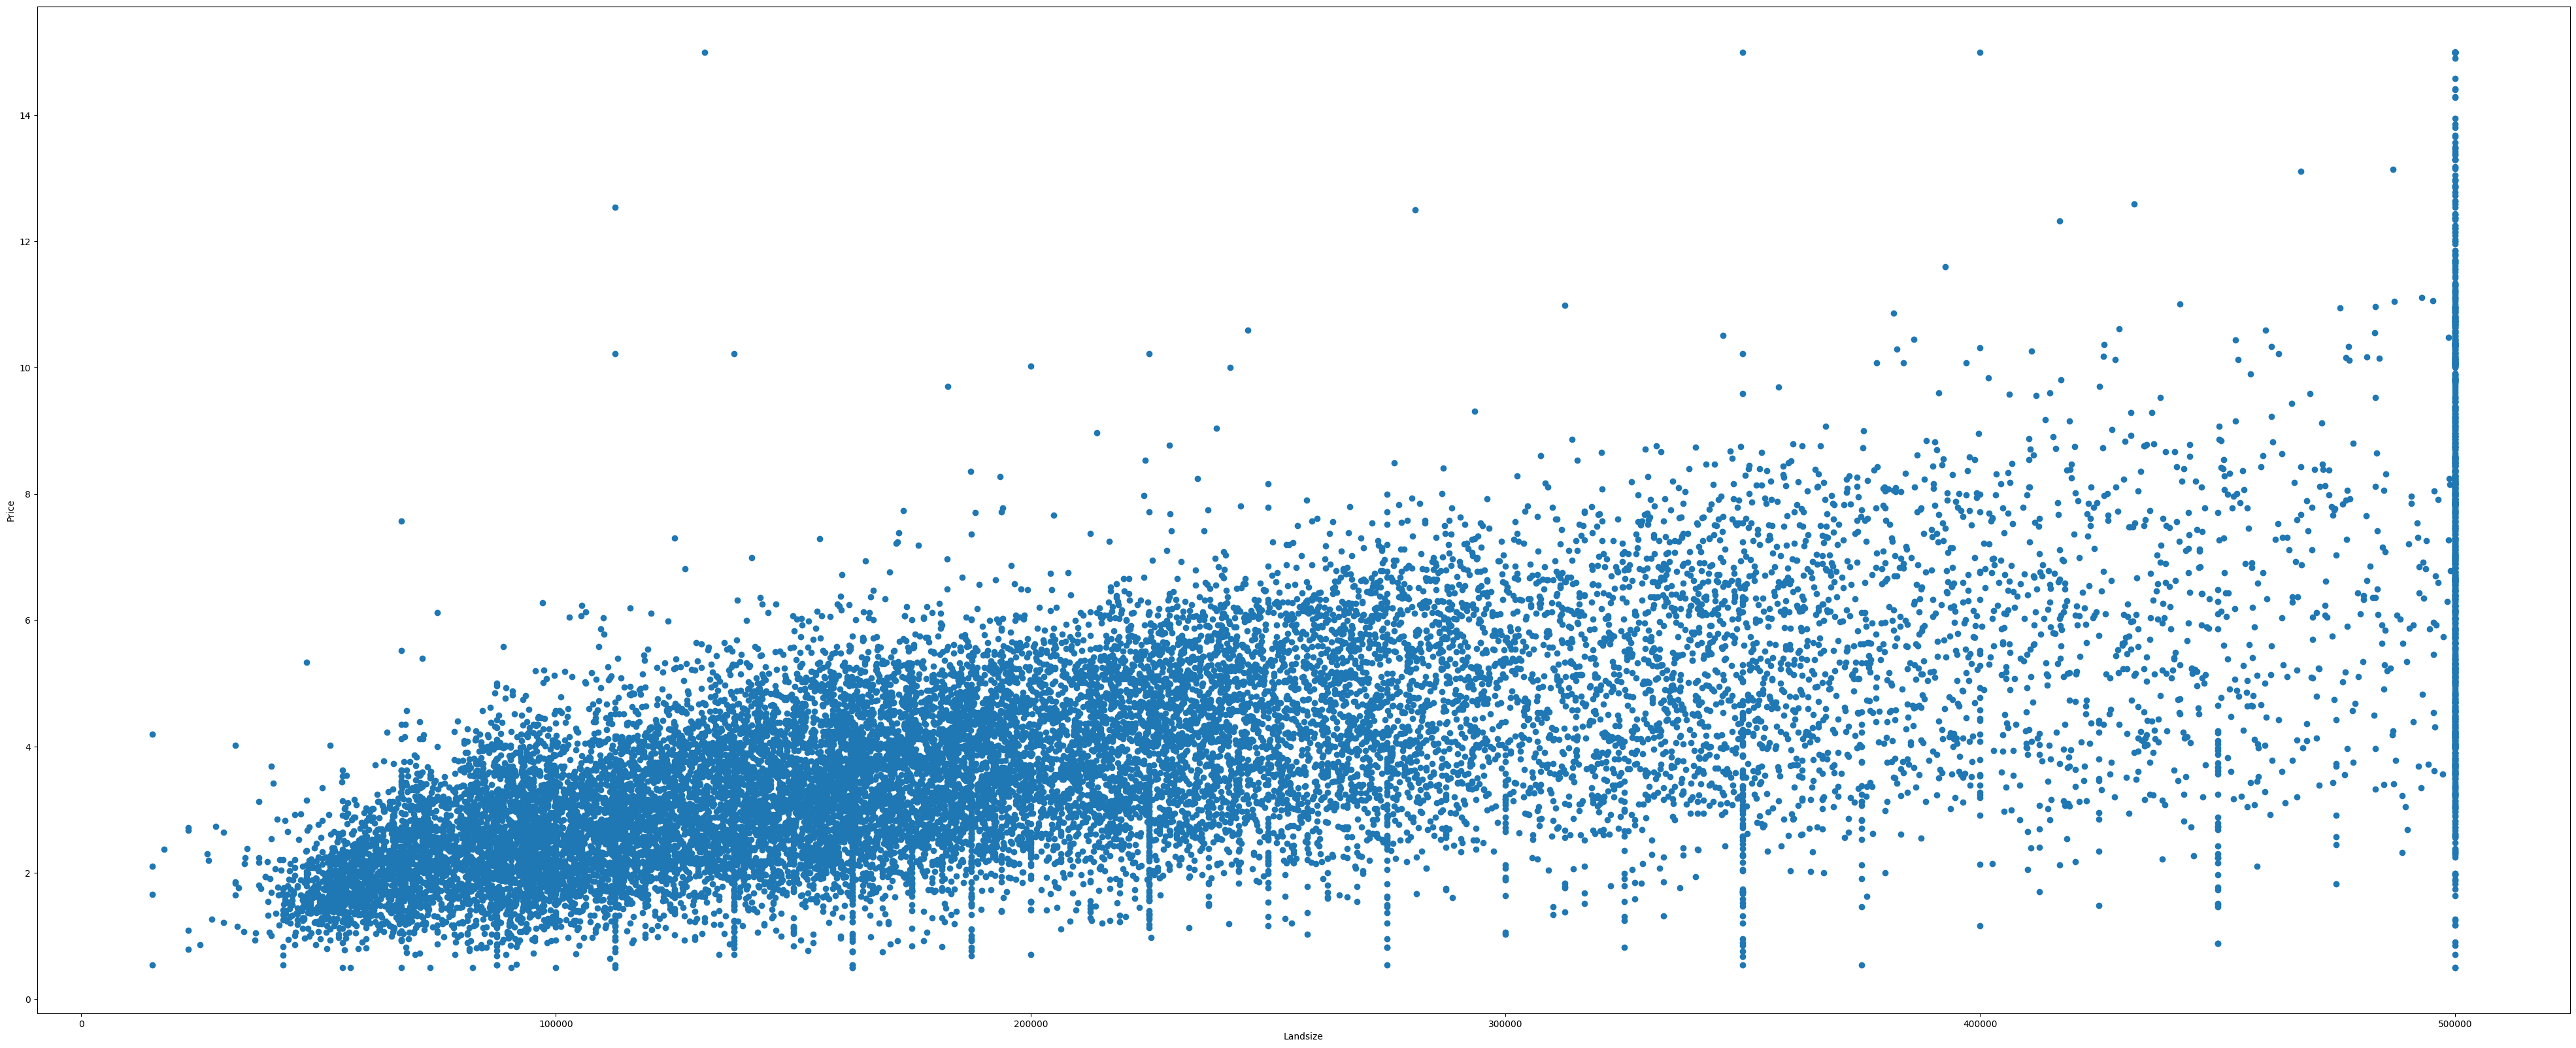

In [177]:
if(Dataframe_path == "database/housing.csv"):
    plt.figure(figsize=(50, 20))
    plt.scatter(new_data['median_house_value'], new_data['median_income'])
    plt.xlabel("Landsize")
    plt.ylabel("Price")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize=(50, 20))
    plt.scatter(new_data['Price'], new_data['BuildingArea'])
    plt.xlabel("Landsize")
    plt.ylabel("Price")

In [178]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [179]:
if(Dataframe_path == "database/housing.csv"):
    y_predicted =  km.fit_predict(new_data[['median_house_value', 'median_income']])
elif(Dataframe_path == "database/csv2.csv"):
    y_predicted =  km.fit_predict(new_data[['BuildingArea', 'Price']])
y_predicted

array([1, 1, 1, ..., 2, 2, 2])

In [180]:
new_data['cluster'] = y_predicted
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


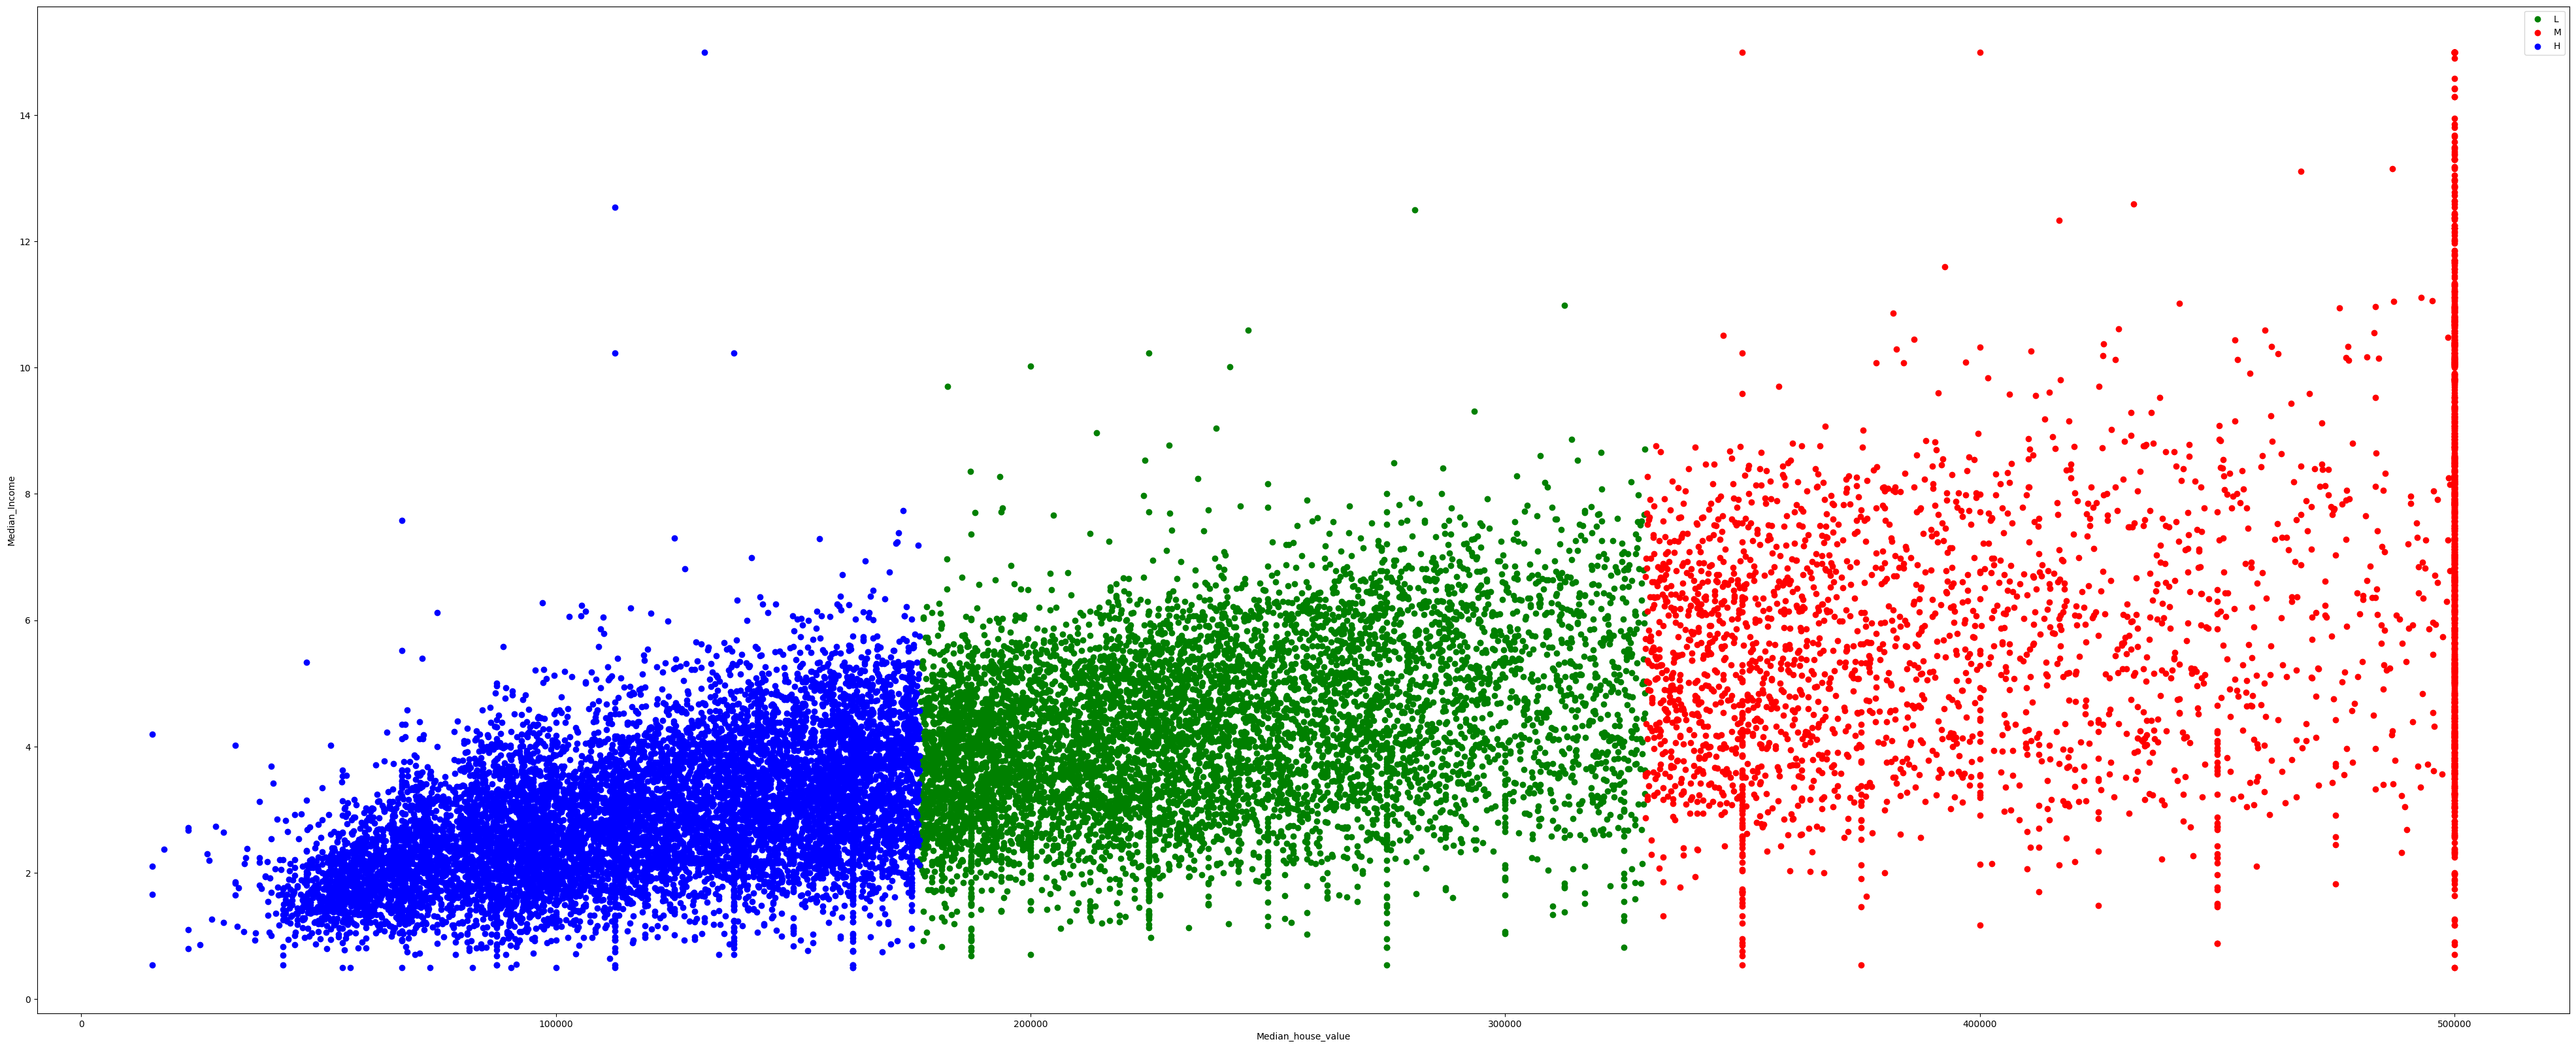

In [181]:
dataframe_1 = new_data[new_data.cluster == 0]
dataframe_2 = new_data[new_data.cluster == 1]
dataframe_3 = new_data[new_data.cluster == 2]

if(Dataframe_path == "database/housing.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.median_house_value, dataframe_1['median_income'], color='green')
    plt.scatter(dataframe_2.median_house_value, dataframe_2['median_income'], color='red')
    plt.scatter(dataframe_3.median_house_value, dataframe_3['median_income'], color='blue')
    plt.xlabel("Median_house_value")
    plt.ylabel("Median_Income")
    plt.legend("LMH")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.Price, dataframe_1['BuildingArea'], color='green')
    plt.scatter(dataframe_2.Price, dataframe_2['BuildingArea'], color='red')
    plt.scatter(dataframe_3.Price, dataframe_3['BuildingArea'], color='blue')
    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.legend("Price")

<strong>Data Processing anf Scalling (MinMaxScaler)</strong>

In [182]:
minmaxscaler = MinMaxScaler()
if(Dataframe_path == "database/housing.csv"):
    minmaxscaler.fit(new_data[['median_house_value']])
    new_data['median_house_value'] = minmaxscaler.transform(new_data['median_house_value'].values.reshape(-1, 1))
elif(Dataframe_path == "database/csv2.csv"):
    minmaxscaler.fit(new_data[['Price']])
    new_data['Price'] = minmaxscaler.transform(new_data['Price'].values.reshape(-1, 1))
    # new_data['Price'] = minmaxscaler.transform(new_data[['Price']]) Also works if passed as a dataframe
new_data.head()

d:\Swinburne\Year 2 - Sem 2\Computing Design Innovation Project\Project ENV\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.902266,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.708247,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.695051,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.672783,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.674638,NEAR BAY,1


In [183]:
if(Dataframe_path == "database/housing.csv"):
    minmaxscaler.fit(new_data[['median_income']])
    new_data['median_income'] = minmaxscaler.transform(new_data['median_income'].values.reshape(-1, 1))
elif(Dataframe_path == "database/csv2.csv"):
    minmaxscaler.fit(new_data[['BuildingArea']])
    new_data['BuildingArea'] = minmaxscaler.transform(new_data['BuildingArea'].values.reshape(-1, 1))
new_data.head()

d:\Swinburne\Year 2 - Sem 2\Computing Design Innovation Project\Project ENV\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,0.902266,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,0.708247,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,0.695051,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,0.672783,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,0.674638,NEAR BAY,1


In [184]:
km = KMeans(n_clusters=3)
if(Dataframe_path == "database/housing.csv"):
    y_predicted = km.fit_predict(new_data[['median_house_value', 'median_income']])
elif(Dataframe_path == "database/csv2.csv"):
    y_predicted = km.fit_predict(new_data[['Price', 'BuildingArea']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [185]:
new_data['scaled_cluster'] = y_predicted
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,scaled_cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,0.902266,NEAR BAY,1,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,0.708247,NEAR BAY,1,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,0.695051,NEAR BAY,1,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,0.672783,NEAR BAY,1,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,0.674638,NEAR BAY,1,0


<strong>Finding Cluster Centroid</strong>

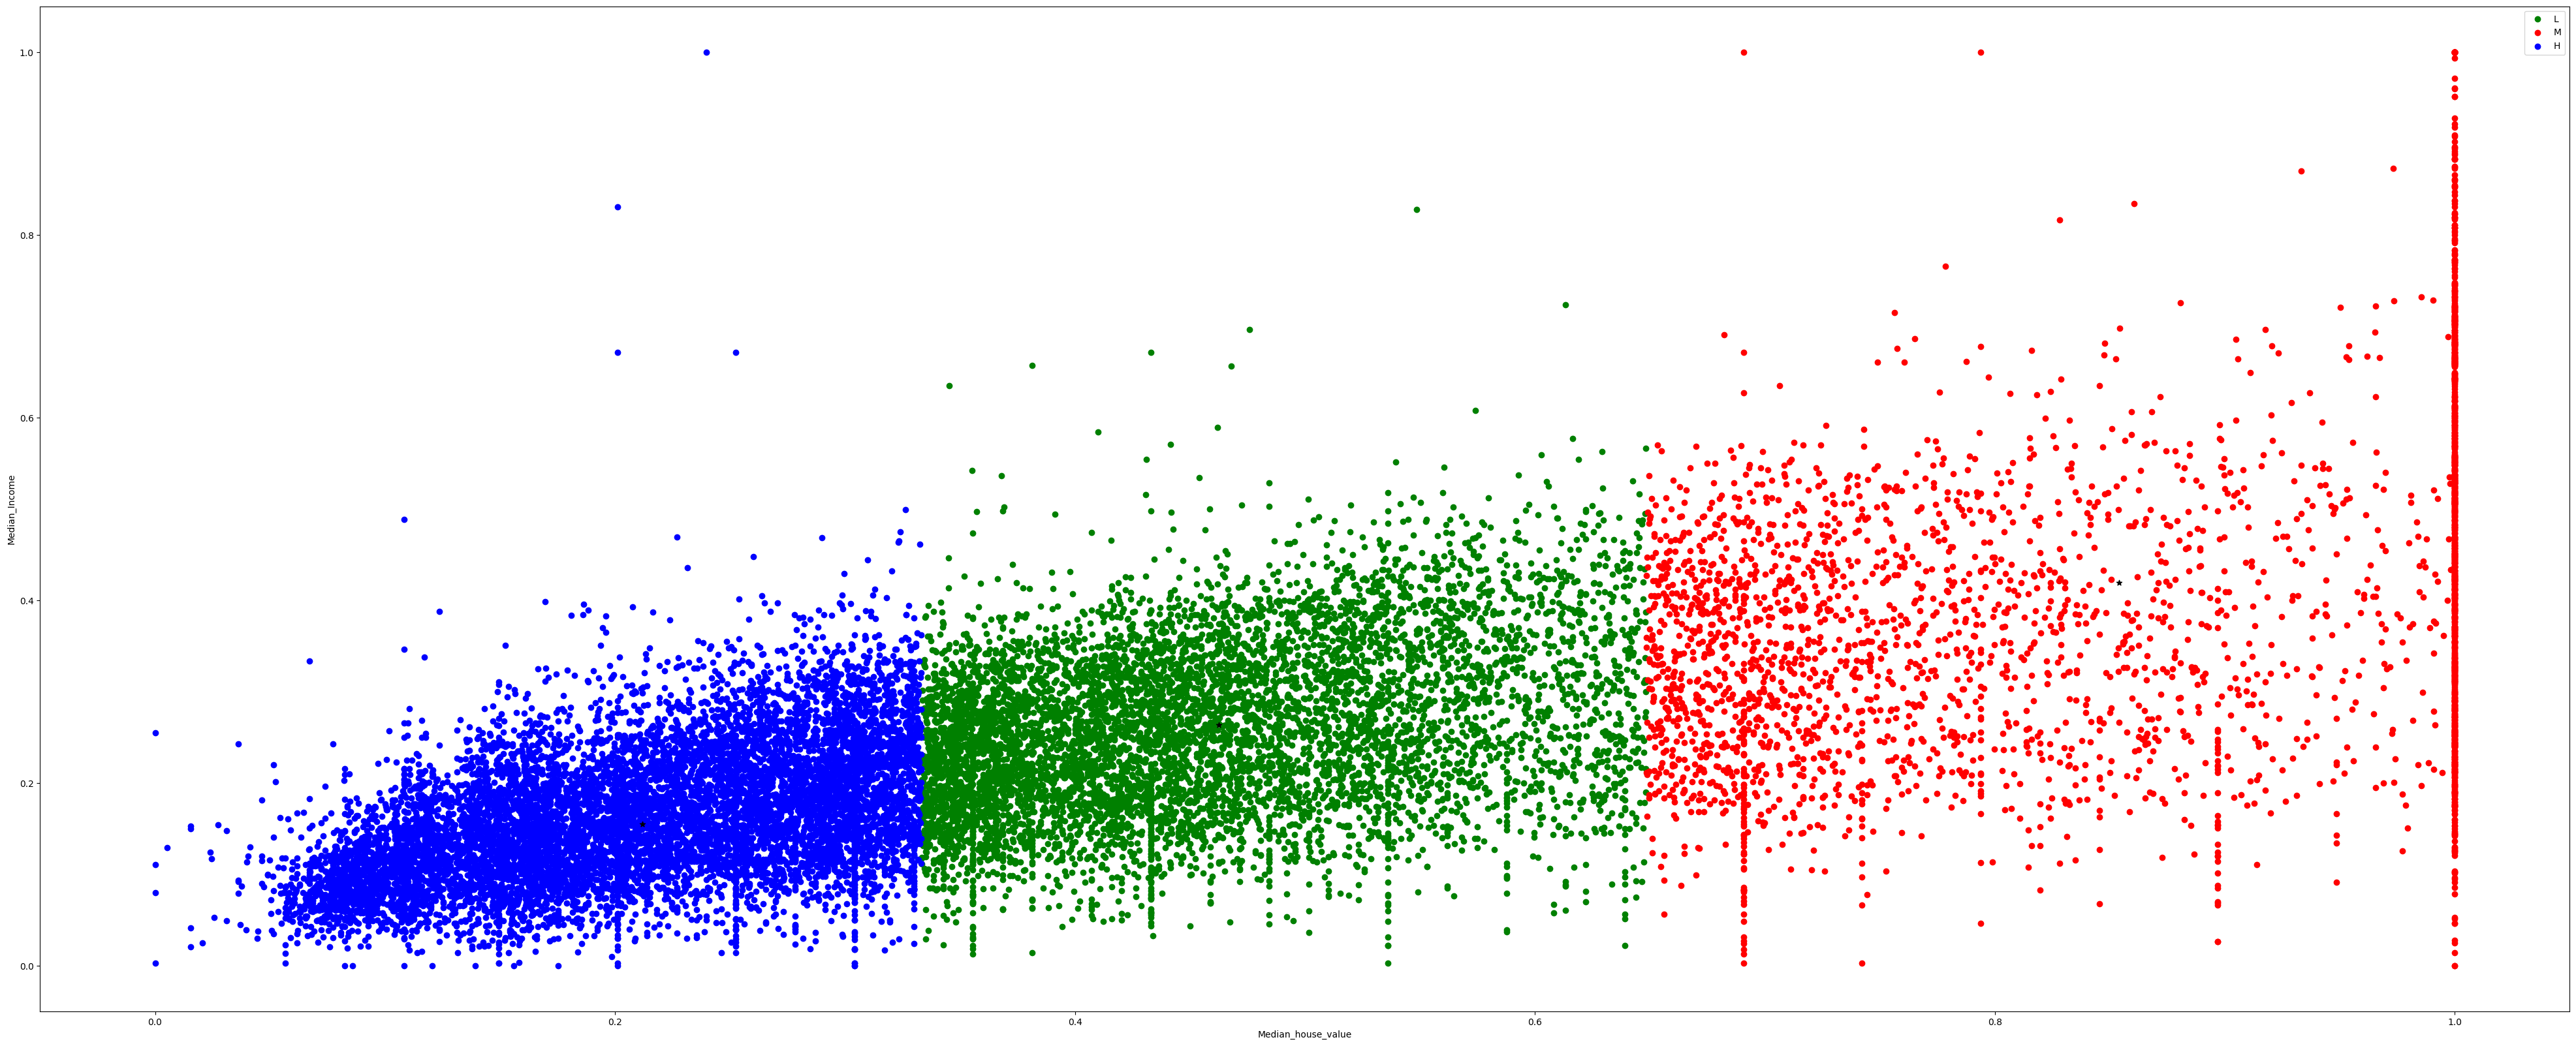

In [186]:
dataframe_1 = new_data[new_data.cluster == 0]
dataframe_2 = new_data[new_data.cluster == 1]
dataframe_3 = new_data[new_data.cluster == 2]

if(Dataframe_path == "database/housing.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.median_house_value, dataframe_1['median_income'], color='green')
    plt.scatter(dataframe_2.median_house_value, dataframe_2['median_income'], color='red')
    plt.scatter(dataframe_3.median_house_value, dataframe_3['median_income'], color='blue')

    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
    
    plt.xlabel("Median_house_value")
    plt.ylabel("Median_Income")
    plt.legend("LMH")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.Price, dataframe_1['BuildingArea'], color='green')
    plt.scatter(dataframe_2.Price, dataframe_2['BuildingArea'], color='red')
    plt.scatter(dataframe_3.Price, dataframe_3['BuildingArea'], color='blue')
    
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')

    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.legend("Price")

<strong>Elbow Plot to find the optimal number of clusters</strong>

In [187]:
km.cluster_centers_

array([[0.46250044, 0.26350641],
       [0.21198941, 0.15491824],
       [0.85409769, 0.41884923]])

In [188]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    if(Dataframe_path == "database/housing.csv"):
        y_predicted = km.fit_predict(new_data[['median_house_value', 'median_income']])
        sse.append(km.inertia_)
    elif(Dataframe_path == "database/csv2.csv"):
        y_predicted = km.fit_predict(new_data[['Price', 'BuildingArea']])
        sse.append(km.inertia_)

In [189]:
sse

[1522.66559073987,
 601.0758510144591,
 366.6007753338901,
 275.6141457698102,
 225.719589295992,
 188.05054235891052,
 162.8143109918717,
 143.37496776769945,
 124.90552342296287]

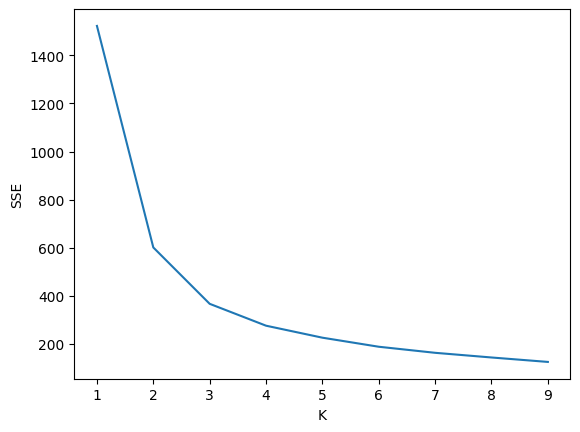

In [190]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)